In [245]:
%reset
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
from scipy import stats
from scipy.stats import norm
import statsmodels.api as sm
from statsmodels.formula.api import ols

Once deleted, variables cannot be recovered. Proceed (y/[n])?  y


In [269]:
mpg=pd.read_csv('cars0460SUVsA.csv')
mpg

,name,sports_car,suv,wagon,minivan,pickup,all_wheel,rear_wheel,msrp,dealer_cost,...,ncyl,ncylA,horsepwr,city_mpg,hwy_mpg,weight,wheel_base,length,width,weight1K
0,BMW X5 4.4i,False,True,False,False,False,True,False,52195,47720,...,eight,morefour,325,16.0,22.0,4824,111,184,74,4.824
1,Cadillac Escaladet,False,True,False,False,False,False,False,52795,48377,...,eight,morefour,295,14.0,18.0,5367,116,199,79,5.367
2,Cadillac SRX V8,False,True,False,False,False,False,False,46995,43523,...,eight,morefour,320,16.0,21.0,4302,116,195,73,4.302
3,Chevrolet Suburban 1500 LT,False,True,False,False,False,False,False,42735,37422,...,eight,morefour,295,14.0,18.0,4947,130,219,79,4.947
4,Chevrolet Tahoe LT,False,True,False,False,False,True,False,41465,36287,...,eight,morefour,295,14.0,18.0,5050,116,197,79,5.050
5,CMC Yukon 1500 SLE,False,True,False,False,False,False,False,35725,31361,...,eight,morefour,285,16.0,19.0,5042,116,199,79,5.042
6,Dodge Durango SLT,False,True,False,False,False,True,False,32235,29472,...,eight,morefour,230,15.0,21.0,4987,119,201,76,4.987
7,Ford Excursion 6.8 XLT,False,True,False,False,False,True,False,41475,36494,...,eight,morefour,310,NaN,NaN,7190,137,227,80,7.190
8,GMC Yukon XL 2500 SLT,False,True,False,False,False,True,False,46265,40534,...,eight,morefour,325,13.0,17.0,6133,130,219,79,6.133
9,Hummer H2,False,True,False,False,False,True,False,49995,45815,...,eight,morefour,316,10.0,12.0,6400,123,190,81,6.400


In [279]:
mpg["msrpK"]=(mpg["msrp"]/1000)
#mpg

<AxesSubplot:xlabel='weight', ylabel='hwy_mpg'>

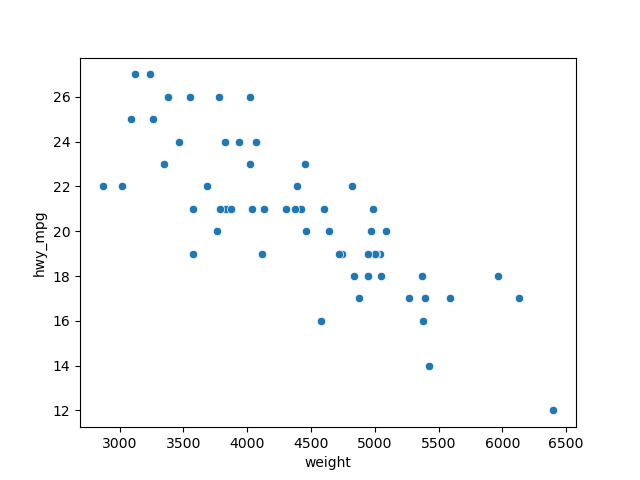

In [280]:
plt.clf()
fig=plt.figure()
ax=fig.add_subplot(111)
sns.scatterplot(data=mpg, x="weight", y="hwy_mpg")

In [281]:
#fit the simple linear regression model
model1=ols('hwy_mpg~msrpK',data=mpg)
results1=model1.fit()
print(results1.summary2())

                 Results: Ordinary least squares
Model:              OLS              Adj. R-squared:     0.500   
Dependent Variable: hwy_mpg          AIC:                266.3911
Date:               2022-11-04 20:50 BIC:                270.5461
No. Observations:   59               Log-Likelihood:     -131.20 
Df Model:           1                F-statistic:        58.89   
Df Residuals:       57               Prob (F-statistic): 2.39e-10
R-squared:          0.508            Scale:              5.1754  
------------------------------------------------------------------
               Coef.   Std.Err.     t     P>|t|    [0.025   0.975]
------------------------------------------------------------------
Intercept     26.4352    0.8127  32.5270  0.0000  24.8078  28.0626
msrpK         -0.1675    0.0218  -7.6742  0.0000  -0.2112  -0.1238
-----------------------------------------------------------------
Omnibus:               0.001        Durbin-Watson:          1.343
Prob(Omnibus):        

eval_env: 1


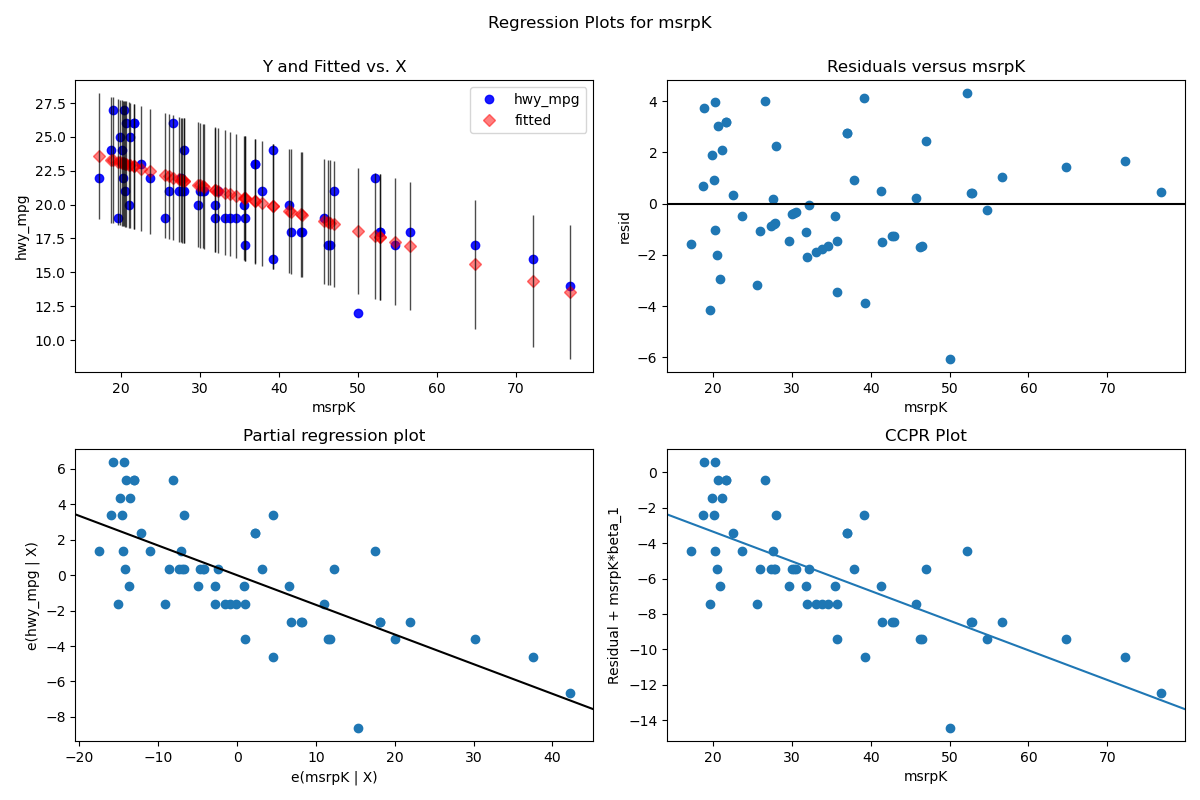

In [282]:
plt.clf()
fig=plt.figure(figsize=(12,8))
fig=sm.graphics.plot_regress_exog(results1,'msrpK',fig=fig)

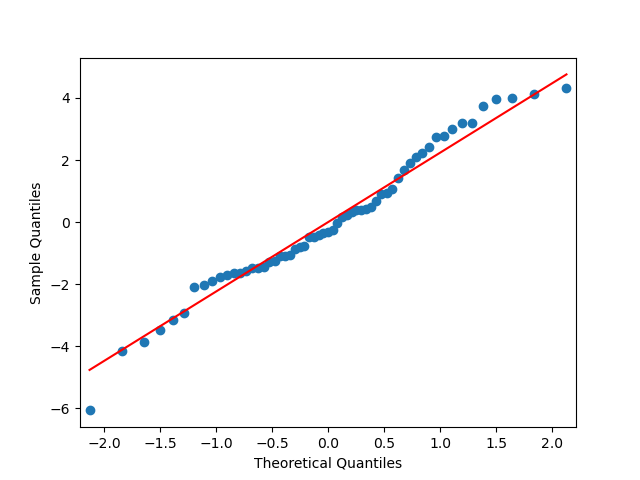

In [283]:
plt.clf()
sm.qqplot(results1.resid,line='s')
plt.show()

<AxesSubplot:>

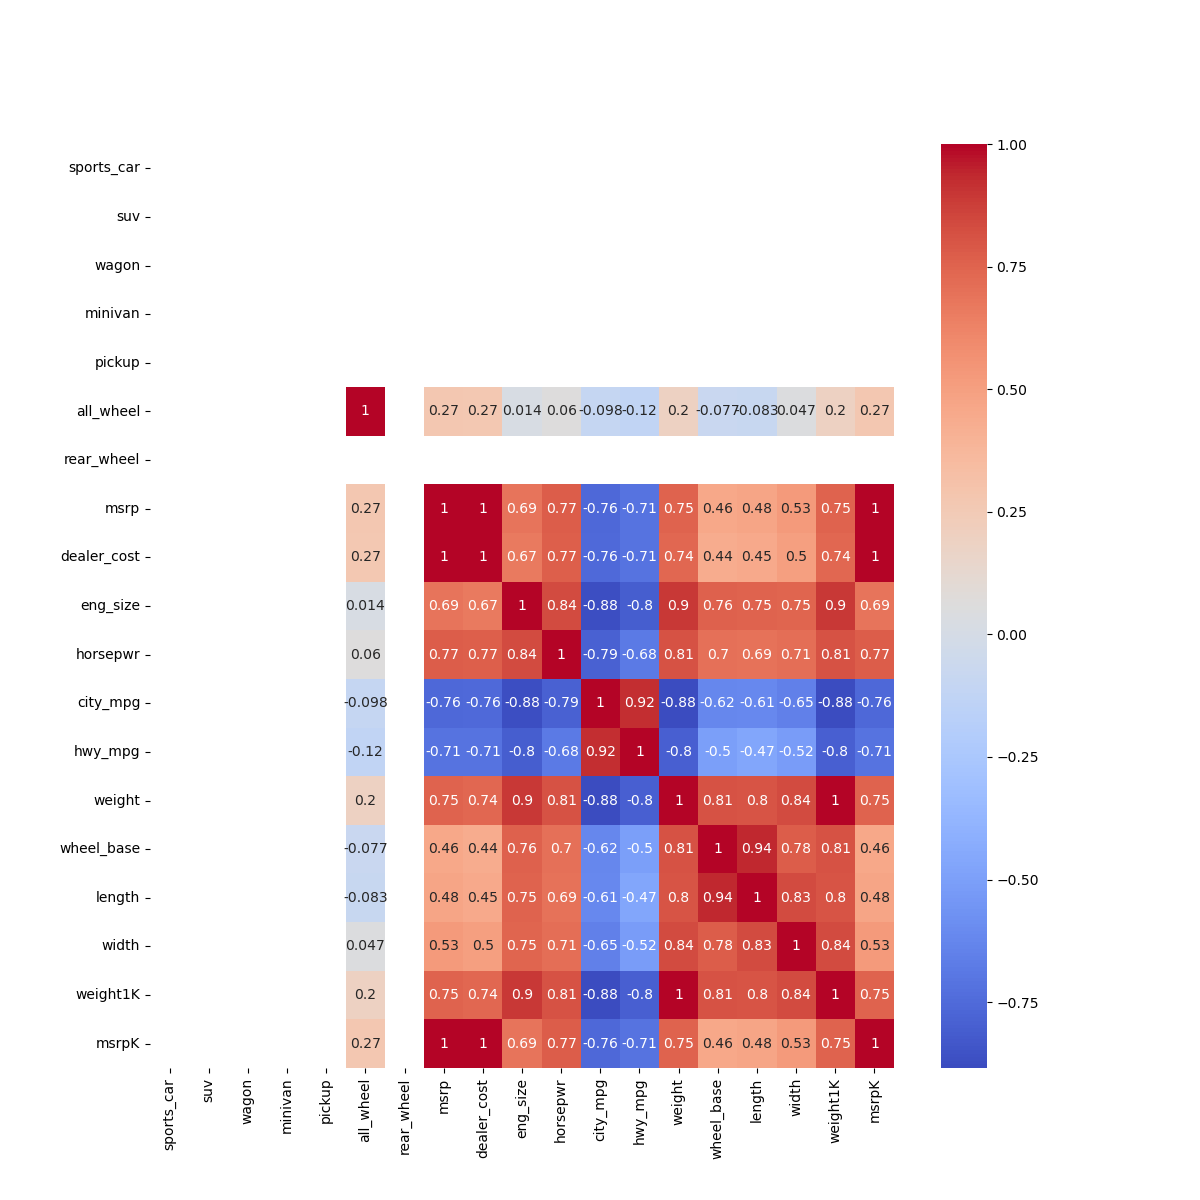

In [284]:
correlations=mpg.corr()
cmap=sns.color_palette("coolwarm",as_cmap=True)

fig, ax = plt.subplots(figsize=(12,12))
sns.heatmap(correlations,annot=True,cmap=cmap)

In [285]:
#fit another predictor to the model: multiple variable regression
model2=ols('hwy_mpg~eng_size+weight',data=mpg)
results2=model2.fit()
print(results2.summary2())

                 Results: Ordinary least squares
Model:              OLS              Adj. R-squared:     0.674   
Dependent Variable: hwy_mpg          AIC:                242.1127
Date:               2022-11-04 20:50 BIC:                248.3453
No. Observations:   59               Log-Likelihood:     -118.06 
Df Model:           2                F-statistic:        60.87   
Df Residuals:       56               Prob (F-statistic): 9.01e-15
R-squared:          0.685            Scale:              3.3744  
------------------------------------------------------------------
               Coef.   Std.Err.     t     P>|t|    [0.025   0.975]
------------------------------------------------------------------
Intercept     33.0929    1.4085  23.4953  0.0000  30.2714  35.9145
eng_size      -1.3508    0.4961  -2.7226  0.0086  -2.3447  -0.3569
weight        -0.0016    0.0006  -2.6343  0.0109  -0.0029  -0.0004
-----------------------------------------------------------------
Omnibus:             

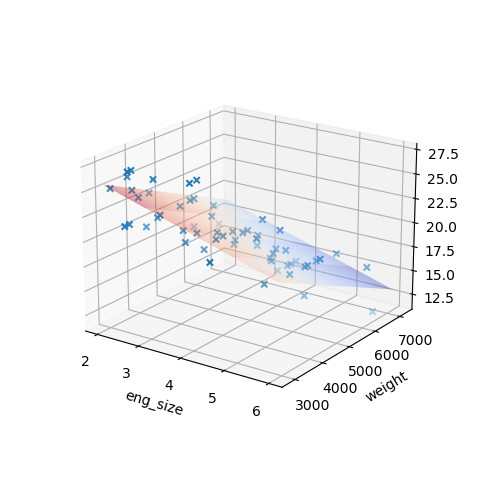

In [286]:
plt.clf()
%matplotlib widget
fig=plt.figure(figsize=plt.figaspect(1)*1)
ax=fig.add_subplot(111,projection='3d')

x=mpg['eng_size']
y=mpg['weight']
z=mpg['hwy_mpg']
plt.xlabel("eng_size")
plt.ylabel("weight")

ax.scatter(x,y,z,marker='x',label="Raw Data")
ax.view_init(elev=20.,azim=305)

#ax.scatter(x.values,y.values,results1.fittedvalues.values)

x1,y1=model2.exog_names[1:]

x_surf=np.arange(mpg['eng_size'].min(), mpg['eng_size'].max())
y_surf=np.arange(mpg['weight'].min(), mpg['weight'].max())
xS,yS=np.meshgrid(x_surf,y_surf)

exog=pd.DataFrame({x1: xS.ravel(), y1:yS.ravel()})
zS=results2.predict(exog=exog).values.reshape(xS.shape)
ax.plot_surface(xS,yS,zS,alpha=0.4,cmap='coolwarm')

Text(0, 0.5, 'resdiauls')

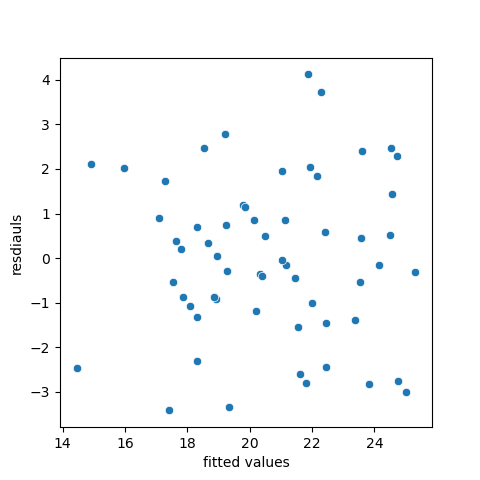

In [287]:
plt.clf()
fig=plt.figure(figsize=plt.figaspect(1)*1)
ax=fig.add_subplot(111)
sns.scatterplot(x=results2.fittedvalues,y=results2.resid)
plt.xlabel("fitted values")
plt.ylabel("resdiauls")

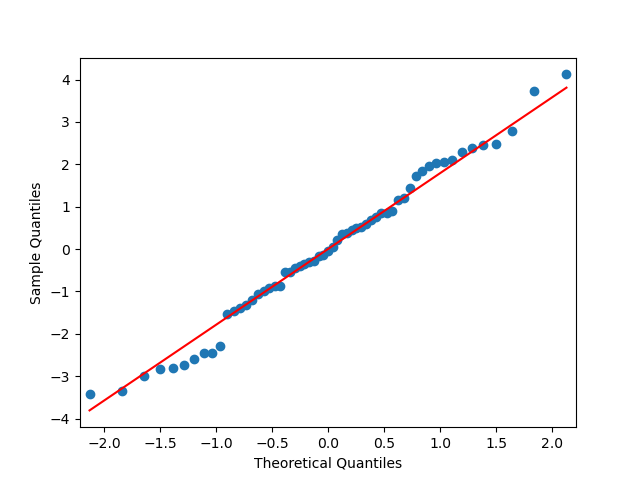

In [288]:
plt.clf()
sm.qqplot(results2.resid,line='s')
plt.show()

In [289]:
#fit another predictor to the model: multiple variable regression; continuous predictor
model3=ols('hwy_mpg~msrpK+eng_size',data=mpg)
results3=model3.fit()
print(results3.summary2())

                 Results: Ordinary least squares
Model:              OLS              Adj. R-squared:     0.676   
Dependent Variable: hwy_mpg          AIC:                241.7680
Date:               2022-11-04 20:50 BIC:                248.0006
No. Observations:   59               Log-Likelihood:     -117.88 
Df Model:           2                F-statistic:        61.40   
Df Residuals:       56               Prob (F-statistic): 7.65e-15
R-squared:          0.687            Scale:              3.3547  
------------------------------------------------------------------
               Coef.   Std.Err.     t     P>|t|    [0.025   0.975]
------------------------------------------------------------------
Intercept     30.2012    0.9340  32.3370  0.0000  28.3303  32.0721
msrpK         -0.0674    0.0249  -2.7034  0.0091  -0.1174  -0.0175
eng_size      -1.8691    0.3308  -5.6510  0.0000  -2.5317  -1.2065
-----------------------------------------------------------------
Omnibus:             

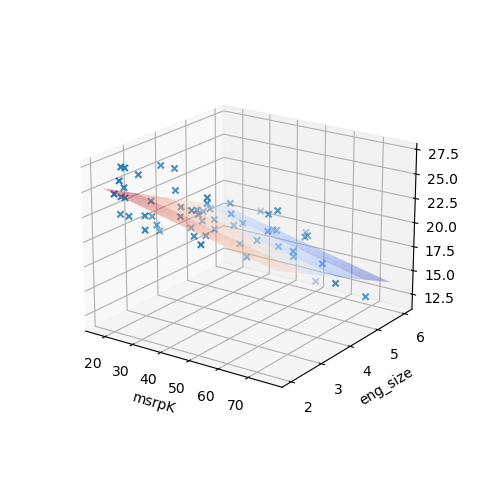

In [290]:
plt.clf()
fig=plt.figure(figsize=plt.figaspect(1)*1)
ax=fig.add_subplot(111,projection='3d')

x=mpg['msrpK']
y=mpg['eng_size']
z=mpg['hwy_mpg']
plt.xlabel("msrpK")
plt.ylabel("eng_size")

ax.scatter(x,y,z,marker='x',label="Raw Data")
ax.view_init(elev=20.,azim=305)

#ax.scatter(x.values,y.values,results1.fittedvalues.values)

x1,y1=model3.exog_names[1:]

x_surf=np.arange(mpg['msrpK'].min(), mpg['msrpK'].max())
y_surf=np.arange(mpg['eng_size'].min(), mpg['eng_size'].max())
xS,yS=np.meshgrid(x_surf,y_surf)

exog=pd.DataFrame({x1: xS.ravel(), y1:yS.ravel()})
zS=results3.predict(exog=exog).values.reshape(xS.shape)
ax.plot_surface(xS,yS,zS,alpha=0.4,cmap='coolwarm')

In [291]:
#fit another predictor to the model: multiple variable regression; continuous predictor
model4=ols('hwy_mpg~msrpK+eng_size+(msrpK*eng_size)',data=mpg)
results4=model4.fit()
print(results4.summary2())

                 Results: Ordinary least squares
Model:              OLS              Adj. R-squared:     0.671   
Dependent Variable: hwy_mpg          AIC:                243.4973
Date:               2022-11-04 20:50 BIC:                251.8074
No. Observations:   59               Log-Likelihood:     -117.75 
Df Model:           3                F-statistic:        40.47   
Df Residuals:       55               Prob (F-statistic): 6.04e-14
R-squared:          0.688            Scale:              3.4001  
-----------------------------------------------------------------
                   Coef.  Std.Err.    t    P>|t|   [0.025  0.975]
-----------------------------------------------------------------
Intercept         28.7563   3.0231  9.5123 0.0000 22.6979 34.8146
msrpK             -0.0165   0.1043 -0.1582 0.8748 -0.2256  0.1926
eng_size          -1.5156   0.7777 -1.9488 0.0564 -3.0742  0.0430
msrpK:eng_size    -0.0117   0.0233 -0.5029 0.6170 -0.0584  0.0350
---------------------------

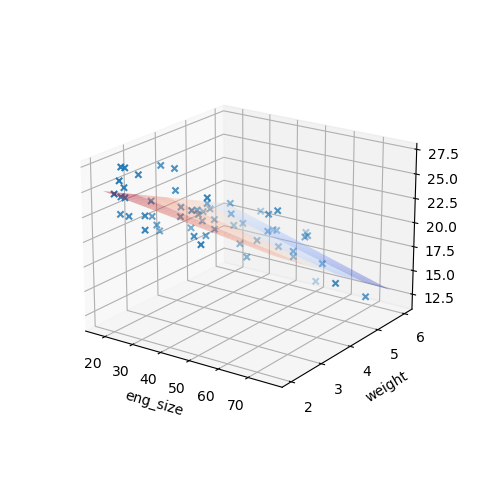

In [292]:
fig=plt.figure(figsize=plt.figaspect(1)*1)
ax=fig.add_subplot(111,projection='3d')

x=mpg['msrpK']
y=mpg['eng_size']
z=mpg['hwy_mpg']
plt.xlabel("eng_size")
plt.ylabel("weight")

ax.scatter(x,y,z,marker='x',label="Raw Data")
ax.view_init(elev=20.,azim=305)

#ax.scatter(x.values,y.values,results1.fittedvalues.values)

x1,y1,y2=model4.exog_names[1:]

x_surf=np.arange(mpg['msrpK'].min(), mpg['msrpK'].max())
y_surf=np.arange(mpg['eng_size'].min(), mpg['eng_size'].max())
xS,yS=np.meshgrid(x_surf,y_surf)

exog=pd.DataFrame({x1: xS.ravel(), y1:yS.ravel(),y2:y2})
zS=results4.predict(exog=exog).values.reshape(xS.shape)
ax.plot_surface(xS,yS,zS,alpha=0.4,cmap='coolwarm')

In [293]:
model5=ols('hwy_mpg~weight1K',data=mpg)
results5=model5.fit()
print(results5.summary2())

                 Results: Ordinary least squares
Model:              OLS              Adj. R-squared:     0.637   
Dependent Variable: hwy_mpg          AIC:                247.4469
Date:               2022-11-04 20:50 BIC:                251.6020
No. Observations:   59               Log-Likelihood:     -121.72 
Df Model:           1                F-statistic:        102.8   
Df Residuals:       57               Prob (F-statistic): 2.27e-14
R-squared:          0.643            Scale:              3.7540  
------------------------------------------------------------------
              Coef.   Std.Err.     t      P>|t|    [0.025   0.975]
------------------------------------------------------------------
Intercept    34.4616    1.3878   24.8325  0.0000  31.6826  37.2405
weight1K     -3.1457    0.3103  -10.1378  0.0000  -3.7671  -2.5243
-----------------------------------------------------------------
Omnibus:               0.621        Durbin-Watson:          1.584
Prob(Omnibus):        

In [294]:
model3=ols('hwy_mpg~weight+ncylA',data=mpg)
results3=model3.fit()
print(results3.summary2())

                 Results: Ordinary least squares
Model:              OLS              Adj. R-squared:     0.669   
Dependent Variable: hwy_mpg          AIC:                242.9303
Date:               2022-11-04 20:50 BIC:                249.1629
No. Observations:   59               Log-Likelihood:     -118.47 
Df Model:           2                F-statistic:        59.65   
Df Residuals:       56               Prob (F-statistic): 1.33e-14
R-squared:          0.681            Scale:              3.4215  
-----------------------------------------------------------------
                   Coef.  Std.Err.    t    P>|t|   [0.025  0.975]
-----------------------------------------------------------------
Intercept         34.5621   1.3255 26.0756 0.0000 31.9069 37.2173
ncylA[T.morefour] -2.1672   0.8475 -2.5573 0.0133 -3.8648 -0.4695
weight            -0.0027   0.0003 -8.1110 0.0000 -0.0034 -0.0021
-----------------------------------------------------------------
Omnibus:              0.539

In [295]:
barA=mpg['ncylA'].value_counts()
barA=pd.DataFrame(barA)
barA

,ncylA
morefour,53
four,7


In [296]:
#fit another predictor to the model: multiple variable regression with categorical predictor
model6=ols('hwy_mpg~weight*ncylA',data=mpg)
results6=model6.fit()
print(results6.summary2())

                     Results: Ordinary least squares
Model:                  OLS                Adj. R-squared:       0.663   
Dependent Variable:     hwy_mpg            AIC:                  244.9061
Date:                   2022-11-04 20:51   BIC:                  253.2162
No. Observations:       59                 Log-Likelihood:       -118.45 
Df Model:               3                  F-statistic:          39.08   
Df Residuals:           55                 Prob (F-statistic):   1.16e-13
R-squared:              0.681              Scale:                3.4823  
-------------------------------------------------------------------------
                          Coef.  Std.Err.    t    P>|t|   [0.025   0.975]
-------------------------------------------------------------------------
Intercept                36.0693  10.1125  3.5668 0.0008  15.8034 56.3353
ncylA[T.morefour]        -3.7007  10.2345 -0.3616 0.7190 -24.2111 16.8097
weight                   -0.0032   0.0030 -1.0548 0.2961  -

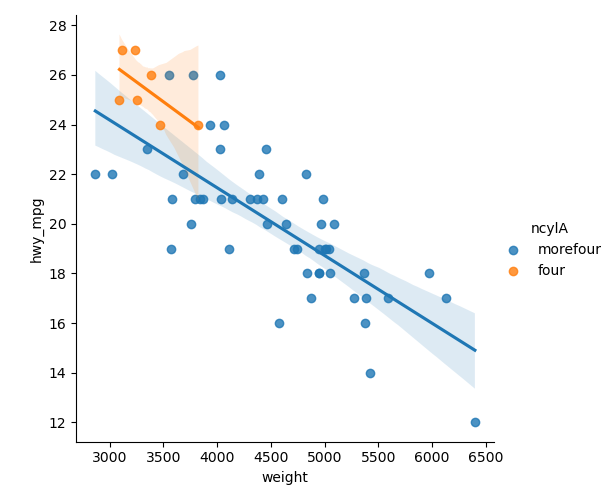

In [297]:
sns.lmplot(x="weight",y="hwy_mpg",hue="ncylA",data=mpg)

In [298]:
pd.get_dummies(mpg.ncylA.values, drop_first=False)

,four,morefour
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1
5,0,1
6,0,1
7,0,1
8,0,1
9,0,1
